In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the images
bikeL=cv2.imread('/content/drive/MyDrive/bikeL.png')
bikeR=cv2.imread('/content/drive/MyDrive/bikeR.png')

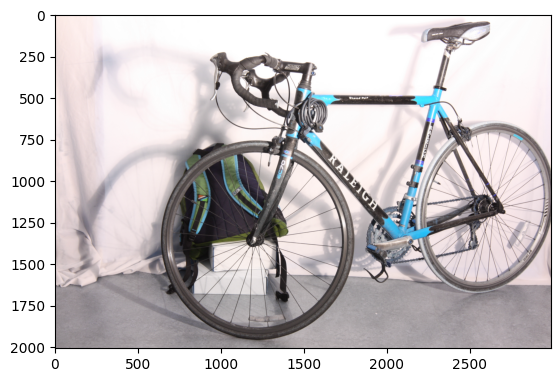

In [3]:
#Show left bicycle
plt.imshow(bikeL)

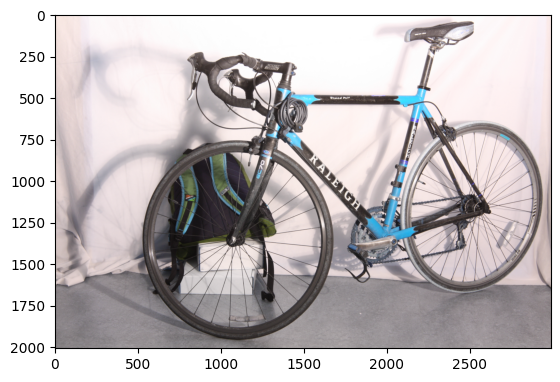

In [4]:
#show right bicycle
plt.imshow(bikeR)

In [5]:
#Convert images to grayscale
bikeL_gray=cv2.cvtColor(bikeL,cv2.COLOR_BGR2GRAY)
bikeR_gray=cv2.cvtColor(bikeR,cv2.COLOR_BGR2GRAY)

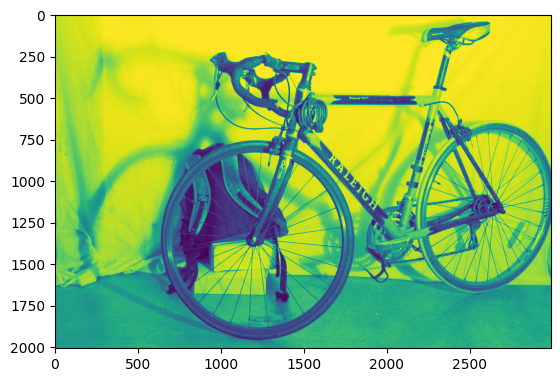

In [6]:
#Show left bicycle grayscale
plt.imshow(bikeL_gray)

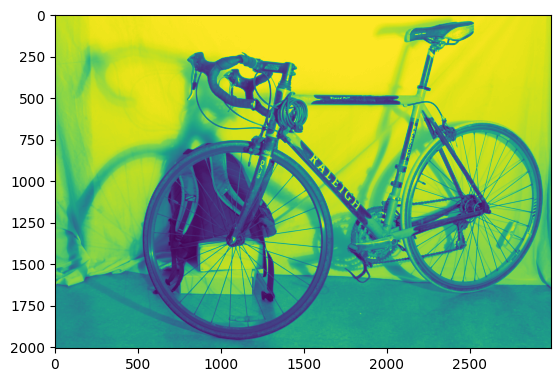

In [7]:
#Show left bicycle grayscale
plt.imshow(bikeR_gray)

In [8]:
# Convert the iamge value to float
left_bike_f = bikeL_gray.astype(np.float32)
right_bike_f = bikeR_gray.astype(np.float32)

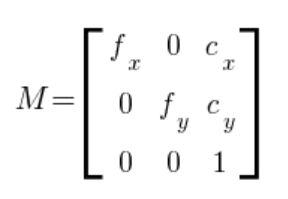

                      #Camera Matrix

In [9]:
# Intrinsic camera matrices
cam0=np.array([[5299.313, 0, 1263.818],
               [0, 5299.313, 977.763],
               [0, 0, 1]])
cam1=np.array([[5299.313, 0, 1438.004],
                 [0, 5299.313, 977.763],
                 [0, 0, 1]])

In [10]:
# Baseline
baseline=177.288

In [11]:
left_bike_f.shape

(2008, 2988)

In [29]:
# Find the disparity map
window=5
disparity=np.zeros_like(left_bike_f, dtype=np.float32)
image_shape_y=left_bike_f.shape[0]
image_shape_x=left_bike_f.shape[1]

for y in range(0,image_shape_y):
  for x in range(0,image_shape_x):
    left_patch=left_bike_f[max(0,y-window//3):min(image_shape_y,y+window//3+1),
                           max(0,x-window//3):min(image_shape_x,x+window//3+1)]
    best_match_x = -1
    best_ssd=float('inf')
    for d in range(max(0,x-window//3),min(image_shape_x,x+window//3+1)):
      right_patch=right_bike_f[max(0,y-window//3):min(image_shape_y,y+window//3+1),
                           max(0,d-window//3):min(image_shape_x,d+window//3+1)]
      if left_patch.shape==right_patch.shape:
        ssd=np.sum((left_patch-right_patch)**2)
        if ssd<best_ssd:
          best_ssd=ssd
          best_match_x=d
    disparity[y,x]=abs(x-best_match_x)

#Please have patience it  will take around 5-8 min

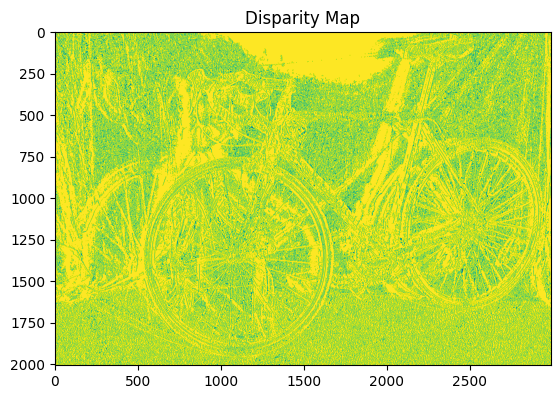

In [30]:
# Plot the disparity map
plt.plot(111)
plt.imshow(disparity, cmap='viridis') #viridis
plt.title('Disparity Map')
plt.show()

**Depth Calculation**

Depth(x,y)=Baseline/Disparity(x,y)​

In [31]:
# Finding the depth map
depth=np.zeros_like(disparity, dtype=np.float32)
for y in range(depth.shape[0]):
  for x in range(depth.shape[1]):
    if disparity[y,x]>0:
      depth[y,x]=(baseline)/disparity[y,x]

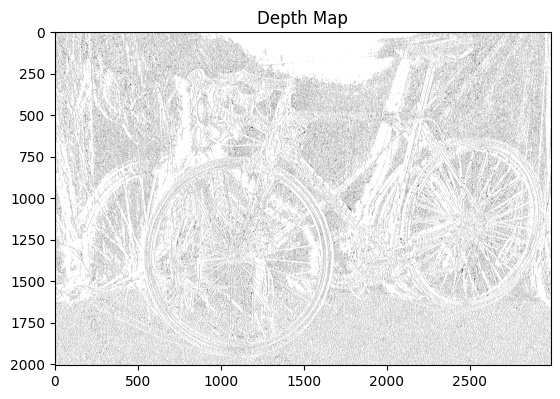

In [34]:
# Plot the depth map
plt.plot(222)
plt.imshow(depth, cmap='gray')
plt.title('Depth Map')
plt.show()

**Point Cloud Calculation**

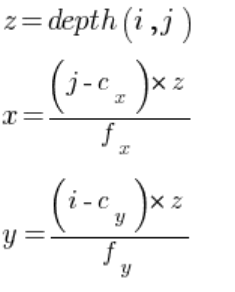

In [37]:
#Extract Point Cloud
Fx=5299.313
Fy=5299.313
Cx=1263.818
Cy=977.763
X_pt=[]
Y_pt=[]
Z_pt=[]
height=depth.shape[0]
width=depth.shape[1]
for i in range(0,height,20):
  for j in range(0,width,20):
    if depth[i,j]>0:
      Z=depth[i][j]
      X=((j-Cx)*Z)/Fx
      Y=((i-Cy)*Z)/Fy
      X_pt.append(X)
      Y_pt.append(Y)
      Z_pt.append(Z)

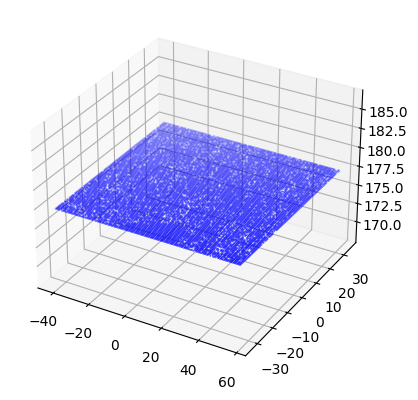

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pt, Y_pt, Z_pt, c='b', marker='o',s=0.1)